<a href="https://colab.research.google.com/github/Kaznabekov214091/Nuwe_Chalenge/blob/main/Light_camera_action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_credits=pd.read_csv('train_credits.csv')
train_titles=pd.read_csv('train_titles.csv')
test_credits=pd.read_csv('test_credits.csv')
test_titles=pd.read_csv('test_titles.csv')

In [ ]:
train_credits.head()

,Unnamed: 0,person_id,id,name,character,role
0,0,25020,tm87233,James Stewart,George Bailey,ACTOR
1,1,26190,tm87233,Donna Reed,Mary Hatch,ACTOR
2,2,25653,tm87233,Lionel Barrymore,Mr. Potter,ACTOR
3,3,13301,tm87233,Thomas Mitchell,Uncle Billy,ACTOR
4,4,34171,tm87233,Henry Travers,Clarence,ACTOR


In [ ]:
train_titles.head()

,train_idx,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,streaming,imdb_votes,imdb_score,target
0,0,tm164331,The Marquis,MOVIE,"Thomas Gardesse, a traveling alarm systems sal...",2011,G,88,"['comedy', 'european', 'crime', 'drama']",['FR'],NaN,amazon,816,4.9,3
1,1,ts89550,Fire Force,SHOW,"Year 198 of the Solar Era in Tokyo, special fi...",2019,TV-14,24,"['scifi', 'comedy', 'action', 'fantasy', 'anim...",['JP'],2.0,hulu,8621,7.6,6
2,2,tm79689,30 Days of Night,MOVIE,This is the story of an isolated Alaskan town ...,2007,R,113,"['horror', 'thriller', 'action']","['NZ', 'US']",NaN,hulu,181869,6.6,5
3,3,tm372366,306 Hollywood,MOVIE,When two siblings undertake an archaeological ...,2018,NaN,94,['documentation'],['US'],NaN,amazon,307,6.8,5
4,4,tm60248,Child's Play,MOVIE,A single mother gives her son a beloved doll f...,1988,R,87,"['horror', 'thriller', 'fantasy']",['US'],NaN,hbo,108017,6.6,5


In [ ]:
test_credits.head()

,Unnamed: 0,person_id,id,name,character,role
0,0,13138,tm54590,Matt Dillon,Doyle Kennedy,ACTOR
1,1,22083,tm54590,Andrew McCarthy,Wade Corey,ACTOR
2,2,8022,tm54590,Leslie Hope,Lori Bayles,ACTOR
3,3,32610,tm54590,Jeffery Feaster,NaN,ACTOR
4,4,83294,tm54590,Alan Toy,Nelson Alquist,ACTOR


In [ ]:
test_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_votes,streaming
0,tm54590,Kansas,MOVIE,A drifter becomes both a bank robber and a her...,1988,R,110,"['drama', 'thriller', 'crime', 'romance']",['US'],NaN,1237,amazon
1,tm47969,Vibes,MOVIE,Medium Sylvia Pickel and psychometrist Nick De...,1988,PG,99,"['comedy', 'romance']",['US'],NaN,4828,amazon
2,tm124313,Full Moon High,MOVIE,A teenager becomes a werewolf after a family v...,1981,PG,93,"['horror', 'comedy', 'fantasy']",['US'],NaN,1536,amazon
3,tm120963,Girls Just Want to Have Fun,MOVIE,"Janey is new in town, and soon meets Lynne, wh...",1985,PG,87,"['romance', 'comedy', 'music']",['US'],NaN,12425,amazon
4,tm118428,One More Saturday Night,MOVIE,The problems faced by both teenagers and adult...,1986,R,95,['comedy'],['US'],NaN,328,amazon


In [ ]:
train_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258488 entries, 0 to 258487
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  258488 non-null  int64 
 1   person_id   258488 non-null  int64 
 2   id          258488 non-null  object
 3   name        258488 non-null  object
 4   character   233035 non-null  object
 5   role        258488 non-null  object
dtypes: int64(2), object(4)
memory usage: 11.8+ MB


In [ ]:
train_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16545 entries, 0 to 16544
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   train_idx             16545 non-null  int64  
 1   id                    16545 non-null  object 
 2   title                 16545 non-null  object 
 3   type                  16545 non-null  object 
 4   description           16512 non-null  object 
 5   release_year          16545 non-null  int64  
 6   age_certification     8646 non-null   object 
 7   runtime               16545 non-null  int64  
 8   genres                16545 non-null  object 
 9   production_countries  16545 non-null  object 
 10  seasons               4422 non-null   float64
 11  streaming             16545 non-null  object 
 12  imdb_votes            16545 non-null  int64  
 13  imdb_score            16545 non-null  float64
 14  target                16545 non-null  int64  
dtypes: float64(2), int6

In [ ]:
train_titles.describe().T

,count,mean,std,min,25%,50%,75%,max
train_idx,16545.0,8272.000000,4776.274437,0.0,4136.0,8272.0,12408.0,16544.0
release_year,16545.0,2008.226473,20.758918,1912.0,2008.0,2017.0,2020.0,2023.0
runtime,16545.0,81.471804,35.837430,0.0,53.0,88.0,104.0,328.0
seasons,4422.0,2.902307,3.907196,1.0,1.0,2.0,3.0,53.0
imdb_votes,16545.0,25455.513569,105905.614222,5.0,230.0,1306.0,8061.0,2706106.0
imdb_score,16545.0,6.342883,1.288036,1.1,5.6,6.5,7.3,10.0
target,16545.0,4.895678,1.321549,0.0,4.0,5.0,6.0,8.0


In [ ]:
columns_to_drop=['id','title','description','production_countries']

In [ ]:
train_titles.drop(columns_to_drop,axis=1,inplace=True)

In [ ]:
test_titles.drop(columns_to_drop,axis=1,inplace=True)

In [ ]:
train_titles['genres'] = train_titles['genres'].str.strip("[]").str.replace("'", "").str.split(", ")


In [ ]:
test_titles['genres'] =test_titles['genres'].str.strip("[]").str.replace("'", "").str.split(", ")

In [ ]:
train_titles.target=train_titles.target.astype('category')

In [ ]:
train_titles.head()

,train_idx,type,release_year,age_certification,runtime,genres,seasons,streaming,imdb_votes,imdb_score,target
0,0,MOVIE,2011,G,88,"[comedy, european, crime, drama]",NaN,amazon,816,4.9,3
1,1,SHOW,2019,TV-14,24,"[scifi, comedy, action, fantasy, animation, dr...",2.0,hulu,8621,7.6,6
2,2,MOVIE,2007,R,113,"[horror, thriller, action]",NaN,hulu,181869,6.6,5
3,3,MOVIE,2018,NaN,94,[documentation],NaN,amazon,307,6.8,5
4,4,MOVIE,1988,R,87,"[horror, thriller, fantasy]",NaN,hbo,108017,6.6,5


In [ ]:
categories = train_titles['target'].unique()

<Axes: xlabel='release_year', ylabel='Count'>

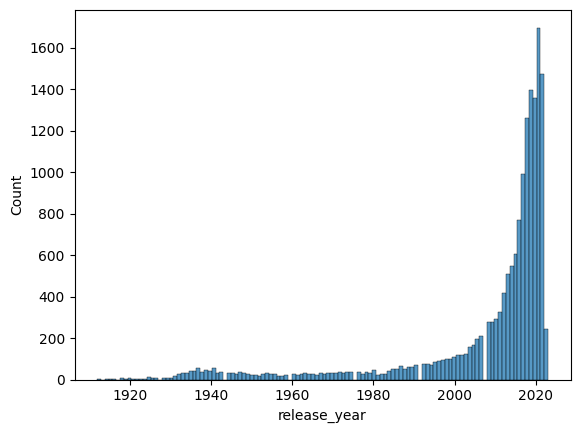

In [ ]:
sns.histplot(train_titles.release_year)

In [ ]:
len(train_titles.age_certification.unique())

13

In [ ]:
len(train_titles.streaming.unique())

5

<Axes: xlabel='seasons', ylabel='Count'>

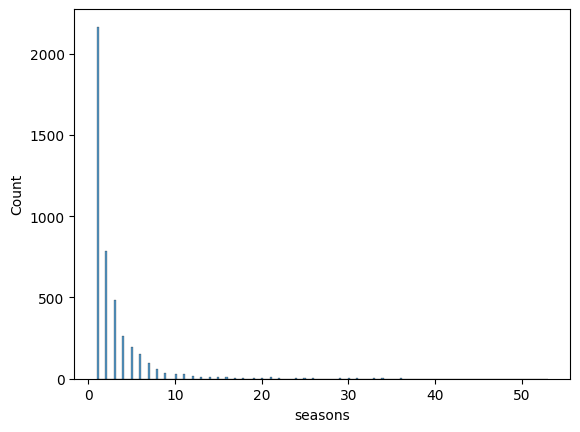

In [ ]:
sns.histplot(train_titles.seasons)

<Axes: xlabel='imdb_votes', ylabel='Count'>

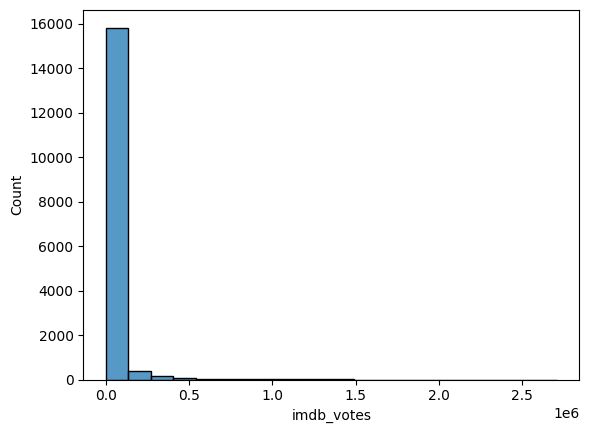

In [ ]:
sns.histplot(train_titles.imdb_votes,bins=20)

<Axes: >

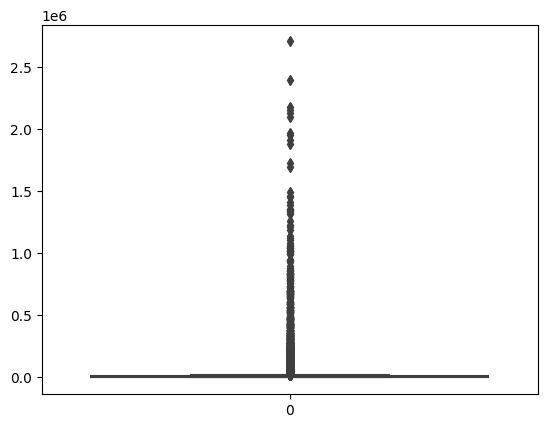

In [ ]:
sns.boxplot(train_titles.imdb_votes)

<Axes: >

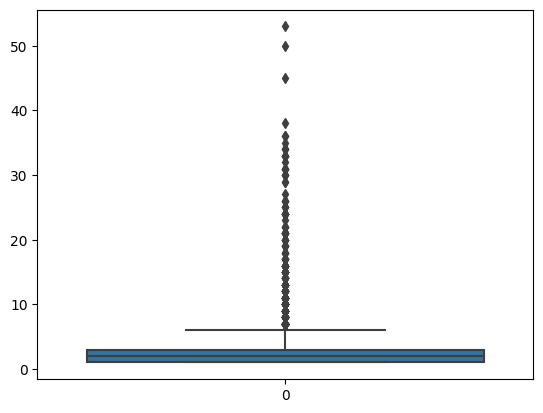

In [ ]:
sns.boxplot(train_titles.seasons)